# Traffic Sign Classification Using KNN

I created a K-Nearest Neighbours (KNN) model for this project in order to group traffic signs into the right groups.  In order to improve the model's effectiveness and efficiency, the goal was to find out how well KNN handled image data while tackling problems like class imbalance and dimensionality reduction. Here is an overview of the actions I took, along with an explanation of my results, observations, and possible areas for improvement.

# Import Libraries

In [4]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Set Paths to Data

In [5]:
data_path = '/Users/fatima..../Documents/GitHub/Intro-AI-Coursework/data/traffic_Data/DATA'
test_path = '/Users/fatima..../Documents/GitHub/Intro-AI-Coursework/data/traffic_Data/TEST'
labels_path = '/Users/fatima..../Documents/GitHub/Intro-AI-Coursework/data/labels.csv'

# Loading and Processing Data
In order to map each class ID to a traffic sign, I first loaded the class labels from a CSV file. I examined the distribution of photographs in each class to have a better understanding of my dataset:

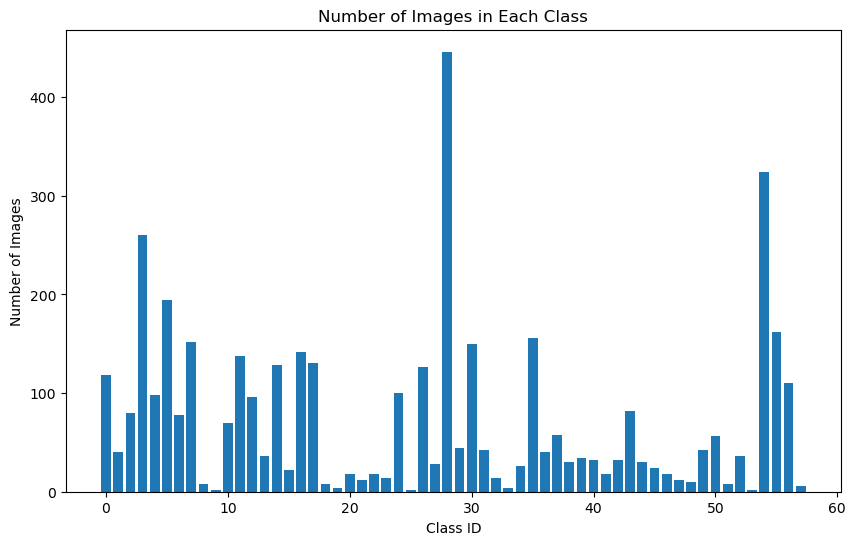

In [6]:
labels = pd.read_csv(labels_path)
class_image_counts = {}
for class_id in range(58):
    directory = os.path.join(data_path, str(class_id))
    if os.path.exists(directory):
        class_image_counts[class_id] = len(os.listdir(directory))
plt.figure(figsize=(10, 6))
plt.bar(class_image_counts.keys(), class_image_counts.values())
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.show()

With some classes having more than 200 photos and others having fewer than 10, the bar chart showed an obvious class imbalance. The overall accuracy might decrease as a result of the model choosing classes with more examples because of this imbalance.